## Final Project Submission

Please fill out:
* Student name: Krystian Dennis
* Student pace: Full Time
* Scheduled project review date/time: 8 August 2019 14:00pm 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


King County House Sales Project

In this project, I want to create a model that is accurate and able to predict homes sales prices in King County, Washington. For this project, I will follow the Data Science Life Cycle so lovingly taught to me by Eli and Abhineet. Throughout the project, I will follow the step below:

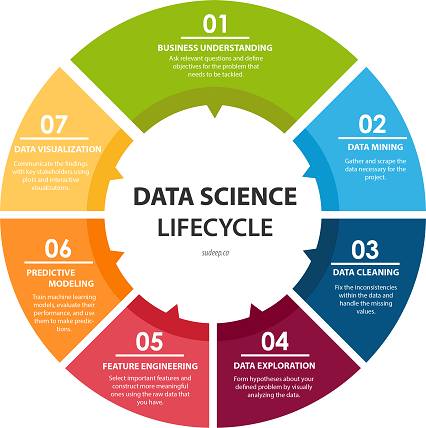

01 Business Understanding

The purpose of this model is to help real estate investors in King County, Washington to decide what the market value of homes for sale should be in their area. I will evaluate real data from sales in their area from May 2, 2014 - May 27, 2015 and use this to create an accurate model to predict the best sales price for a home considering attributes of the property like number of bedrooms and location. 

02 Data Mining 

The data set has been graciouly provided for me as 'kc_house_data.csv'.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

Import Data

In [2]:
# creating a dataframe using Pandas so I can import data set and view first 5 lines using .head() to "inspect" data set 

df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
df.tail()

# quick glance at the last 5 rows using .tail() to explore the data

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
21592      1131     3.0         0.0   0.0     ...          8        1530   
21593      5813     2.0         0.0   0.0     ...          8        2310   
21594      1350     2.0         0.0   0.0     ...          7        1020   
21595      2388     2.0         NaN   0.0     ...          8        1600   
21596      1076     2.0         0.0   0.0     ...          7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [4]:
np.shape(df)

(21597, 21)

In [5]:
df.info()

# checking for # rows, columns, names of columns, data types and columns missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


After calling the .info() method, we see that there are 21,597 rows and 21 columns. Three datatypes: float64 - 8 columns, int64 - 11 columns, object - 2 columns. Waterfront, view and yr_renovated are missing values. At first glance, I believe that sqft_basement should be an integer (int64), like sqft_living15 and sft_lot15. It's currently an object, so I will confirm this and change the data type during data cleaning. Date will later be changed to a datetime data type instead of an object. The 'id' column is an intger but should be an object. 

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Description of the information stored in each column

•	id - Unique Identifier for each house
•	date - Date that each house was sold
•	price - Price house was sold for
•	bedrooms - Number of dedrooms in each house
•	bathrooms - Number of bathrooms in each house divided by the number of bedrooms
•	sqft_living - Square footage of each house
•	sqft_lot - Square footage of the lot each home is built on
•	floors - Total number of floors in  each house
•	waterfront - Whether or not house has a waterfront view
•	view - Ranking of the quality of view from each house with 0 = No View and 4 = Best View 
•	condition - Ranking of overall condition of house with 0 = Worst Condition and 5 = Best Condition
•	grade - King County Grading System assigns overall grade to each house
•	sqft_above - Square footage of each house above ground, not including the basement
•	sqft_basement - Square footage of the basement of each house
•	yr_built - Year each house was built
•	yr_renovated - Year each house was renovated
•	zipcode - Zip Code for each houst
•	lat - Latitudinal coordinate
•	long - Longitudinal coordinate
•	sqft_living15 - Square footage of interior living space for each of the nearest 15 neighbors
•	sqft_lot15 - Square footage of the plots of land for each of the nearest 15 neighbors

In [7]:
np.round(df.describe())

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.159700e+04    21597.0   21597.0    21597.0      21597.0    21597.0   
mean   4.580474e+09   540297.0       3.0        2.0       2080.0    15099.0   
std    2.876736e+09   367368.0       1.0        1.0        918.0    41413.0   
min    1.000102e+06    78000.0       1.0        0.0        370.0      520.0   
25%    2.123049e+09   322000.0       3.0        2.0       1430.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.0       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.0       2550.0    10685.0   
max    9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count  21597.0     19221.0  21534.0    21597.0  21597.0     21597.0   21597.0   
mean       1.0         0.0      0.0        3.0      8.0      1789.0    1971.0   
std        1.0         0.0      1.0        1.0      1.0       828.0      29.0   
min        1.0         0.0      0.0        1.0      3.0       370.0    1900.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0    1951.0   
50%        2.0         0.0      0.0        3.0      7.0      1560.0    1975.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0    1997.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count       17755.0  21597.0  21597.0  21597.0        21597.0     21597.0  
mean           84.0  98078.0     48.0   -122.0         1987.0     12758.0  
std           400.0     54.0      0.0      0.0          685.0     27274.0  
min             0.0  98001.0     47.0   -123.0          399.0       651.0  
25%             0.0  98033.0     47.0   -122.0         1490.0      5100.0  
50%             0.0  98065.0     48.0   -122.0         1840.0      7620.0  
75%             0.0  98118.0     48.0   -122.0         2360.0     10083.0  
max          2015.0  98199.0     48.0   -121.0         6210.0    871200.0

.describe() shows key statistics (5-Point Statistics) for the dataframe. Because of the exponents shown in the original table, I rounded the output to make 'price' easier to understand. The 'id' column is stored as an integer which is why it still being displayed as an exponent after being rounded. I will address this during data cleaning. 

Condition and Grade are likely categorical variables.

In [8]:
for column in df:
    print(column.title())
    print('_________________________________________')
    print('Describe')
    print(df[column].describe())
    print('')
    print('Value Counts')
    print(df[column].value_counts(dropna = False).head())
    print('_________________________________________')
    print('')

Id
_________________________________________
Describe
count    2.159700e+04
mean     4.580474e+09
std      2.876736e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64

Value Counts
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64
_________________________________________

Date
_________________________________________
Describe
count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

Value Counts
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64
_________________________________________

Price
_________________________________________
Describe
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: flo

Value Counts
5000    427
4000    356
6000    288
7200    210
4800    145
Name: sqft_lot15, dtype: int64
_________________________________________



03 Data Cleaning

To determine what data is meaningful in a data set, I start by checking for duplicate entries in the data. 'id' is the unique identifier for each home in the data set.   

In [9]:
print(len(df['id']))
print(df['id'].nunique())

21597
21420


There are 21420 unique values in 'id' and 21597 entries in total. This means that 177 entries in 'id' will be duplicates. Let's confirm that by looking at a sample of duplicate entries in our data set. To do so, we group our data together by 'id' and show instances that there is more than one entry with the same 'id' number. 

In [10]:
df[df.duplicated(['id'], keep=False)].sort_values(by='id').head()

id        date     price  bedrooms  bathrooms  sqft_living  \
2495     1000102   4/22/2015  300000.0         6       3.00         2400   
2494     1000102   9/16/2014  280000.0         6       3.00         2400   
16800    7200179  10/16/2014  150000.0         2       1.00          840   
16801    7200179   4/24/2015  175000.0         2       1.00          840   
11422  109200390  10/20/2014  250000.0         3       1.75         1480   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
2495       9373     2.0         0.0   0.0     ...          7        2400   
2494       9373     2.0         NaN   0.0     ...          7        2400   
16800     12750     1.0         0.0   0.0     ...          6         840   
16801     12750     1.0         0.0   0.0     ...          6         840   
11422      3900     1.0         0.0   0.0     ...          7        1480   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
2495             0.0     1991           0.0    98002  47.3262 -122.214   
2494             0.0     1991           0.0    98002  47.3262 -122.214   
16800            0.0     1925           0.0    98055  47.4840 -122.211   
16801            0.0     1925           NaN    98055  47.4840 -122.211   
11422            0.0     1980           0.0    98023  47.2977 -122.367   

       sqft_living15  sqft_lot15  
2495            2060        7316  
2494            2060        7316  
16800           1480        6969  
16801           1480        6969  
11422           1830        6956  

[5 rows x 21 columns]

The above sample shows that the 'id' occuring more than once indicates that the house was sold more than once. The last entry for each 'id' contains the information for the most recent sale. The date and price differ for each entry. I will remove duplicates by keeping the latest entry for each property and removing the first entry. 

In [11]:
df['id'].drop_duplicates(keep='last',inplace=True)
print(len(df['id']))
print(df['id'].nunique())

21420
21420


After removing our duplicate entries, we can confirm that the total number of entries and the total number of unique entries in 'id' are the same. 

Checking for Missing Values and Placeholders

Chaining together .isnull() and .any() allows me to confirm that waterfront, view and yr_renovated are missing values, as observed in the .info() method. 

In [12]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

But how many values are missing in each column? I used isna().sum() to find that waterfront is missing 2376 values, view is missing 63 values and yr_renovated in missing 3842 values. When I clean the data, I will have to decide whether I will replace these values or remove them from analysis.

In [13]:
df.isna().sum().sort_values(ascending = False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [14]:
df['waterfront'].value_counts(dropna = False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

Waterfront is a categorical variable. Homes with a waterfront view = 1. Homes without a waterfront view = 0. Our data set shows 19075 or 88% of homes with no waterfront view, plus 2376 entries are missing information. This means that 21451 entries have no view or are missing data. Replace missing values with 0.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Waterfront Location'),
 Text(0.5, 1.0, 'Waterfront vs. Price')]

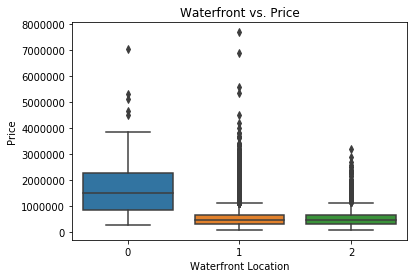

In [15]:
waterfront_and_price = []
waterfront_and_price.append(df[df['waterfront'] == 1.0]['price'])
waterfront_and_price.append(df[df['waterfront'] == 0.0]['price'])
waterfront_and_price.append(df[df['waterfront'].isna()]['price'])

boxplot = sns.boxplot(data = waterfront_and_price)
boxplot.set(xlabel = "Waterfront Location", ylabel='Price', title='Waterfront vs. Price')

There appears to be relationship with waterfront and price. I will replace missing values with 0. 

In [16]:
df['waterfront'].fillna(0, inplace=True)

View

In [17]:
df['view'].value_counts(dropna = False)

 0.0    19422
 2.0      957
 3.0      508
 1.0      330
 4.0      317
NaN        63
Name: view, dtype: int64

View is a categorical variable. The view from a home is ranked from 0 being no view to 5 being a great view. With only 63 values missing in .isna().sum(), it would seem to make the best sense to replace all missing values with 0 - no view using .fillna(). But, upon exploring the .value_counts(), we see again that 19422 entries have a value of 0 = no view plus 63 entries missing data. 

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'View'), Text(0.5, 1.0, 'View vs. Price')]

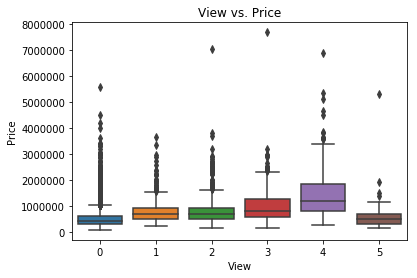

In [18]:
view_and_price = []
view_and_price.append(df[df['view'] == 0.0]['price'])
view_and_price.append(df[df['view'] == 1.0]['price'])
view_and_price.append(df[df['view'] == 2.0]['price'])
view_and_price.append(df[df['view'] == 3.0]['price'])
view_and_price.append(df[df['view'] == 4.0]['price'])
view_and_price.append(df[df['view'].isna()]['price'])

boxplot = sns.boxplot(data = view_and_price)
boxplot.set(xlabel = "View", ylabel='Price', title='View vs. Price')

There is a relationship between view and price. I will replace misssing values with 0. 

In [19]:
df['view'].fillna(0, inplace=True)

Yr_renovated

In [20]:
df['yr_renovated'].value_counts(dropna = False)

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2005.0       29
 2000.0       29
 1990.0       22
 2004.0       22
 2009.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1984.0       16
 1999.0       15
 2001.0       15
 2008.0       15
 2010.0       15
 1983.0       15
 2015.0       14
 1986.0       14
 1987.0       14
 1994.0       14
 1985.0       14
 1992.0       13
 1995.0       12
 1997.0       12
           ...  
 1964.0        5
 1975.0        5
 1973.0        4
 1981.0        4
 1963.0        4
 1969.0        4
 1965.0        4
 1972.0        3
 1956.0        3
 1945.0        3
 1960.0        3
 1978.0        3
 1958.0        3
 1955.0        3
 1974.0        2
 1962.0        2
 1967.0        2
 1940.0        2
 1957.0        2
 1946.0        1
 1959.0        1
 1951.0        1
 1954.0        1
 1950.0        1
 1971.0        1
 1944.0        1
 1948.0        1
 1976.0       

Year renovated is missing 3821 values. Once we run .value_counts() we see that 0 is entered as the year renovated 17011 times. I will replace all missing values with 0.  

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Year Renovated'),
 Text(0.5, 1.0, 'Year Renovated vs. Price')]

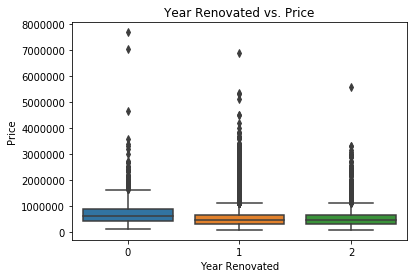

In [21]:
yr_renovated_and_price = []
yr_renovated_and_price.append(df[(df['yr_renovated'] != 0.0) & (df['yr_renovated'].notna())].price)
yr_renovated_and_price.append(df[df['yr_renovated'] == 0.0].price)
yr_renovated_and_price.append(df[df['yr_renovated'].isna()].price)

boxplot = sns.boxplot(data = yr_renovated_and_price)
boxplot.set(xlabel = "Year Renovated", ylabel='Price', title='Year Renovated vs. Price')

In [22]:
df['yr_renovated'].fillna(0, inplace=True)

Sqft_Basement

In [23]:
df['sqft_basement'].value_counts(dropna = False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1245.0        1
2350.0        1
4130.0        1
1525.0        1
906.0         1
1248.0        1
2600.0        1
2570.0        1
2490.0        1
1913.0        1
243.0         1
1852.0        1
1930.0        1
248.0         1
295.0         1
4820.0        1
602.0         1
652.0         1
2610.0        1
768.0         1
283.0         1
225.0         1
2500.0        1
2240.0        1
1880.0        1
1920.0        1
417.0         1
2400.0        1
1284.0        1
1008.0        1
Name: sqft_basement, Len

To confirm, I called .value_counts() and found that "?" are being used as placeholders for 454 entries. Since 59% of houses do not have a basement recorded (value = 0), I determined that the "?" will be replaced with a 0.

In [24]:
df['sqft_basement'].replace('?', 0, inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], downcast='integer')
df['sqft_basement'].value_counts(dropna = False)

0       13280
600       217
500       209
700       208
800       201
400       184
1000      148
900       142
300       142
200       105
750       104
530       103
480       103
450       103
720        98
620        90
580        84
840        83
420        81
860        79
1100       78
670        78
780        76
550        76
650        75
240        74
380        73
680        73
850        72
360        72
        ...  
2610        1
2850        1
915         1
20          1
276         1
143         1
516         1
2190        1
1284        1
2180        1
2196        1
2500        1
2580        1
374         1
2360        1
518         1
4820        1
1798        1
1990        1
2310        1
295         1
935         1
415         1
248         1
792         1
1816        1
1880        1
1960        1
2120        1
1135        1
Name: sqft_basement, Length: 303, dtype: int64

After replacing missing values in waterfront, view sqft_basement and yr_renovated, I ran .isnull().sum() again to confirm that there are no longer any missing values in the data set. 

In [25]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Changing Data Types

When I .info() and .describe() earlier, it was determined that 'id' was stored as an integer but should be an object. The 'id' is a unique identifier for each house. Although it is numerical, it is not going to be used for calculations. I used 'id' to identify and remove duplicates. Going forward, 'id' will not be used for our analysis I will not change the date type as it will be dropped from the dataset.  

'date' was stored as an object but should be formatted as a datetime object to be useful for our analysis. I will change the date type and use .head() to confirm this change. 

In [26]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [27]:
print(f"{df['date'].max()} - {df['date'].min()}")

2015-05-27 00:00:00 - 2014-05-02 00:00:00


To confirm that all data types have been changed, I ran .info() one more time. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int16
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int16(1), int64(11)
memory us

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000132C79BC9B0>,
      dtype=object)

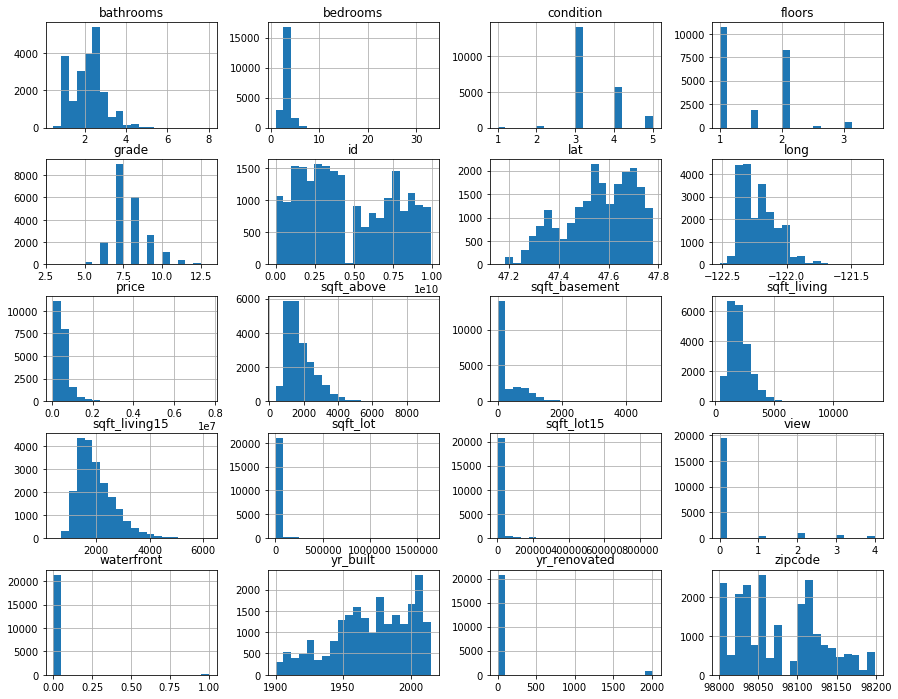

In [29]:
variable = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'id', 'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)

for ax, var in zip(axes.flatten(), variable):
    sns.distplot(df[var], ax=ax, kde = False, rug = True)
    ax.set(title=var)

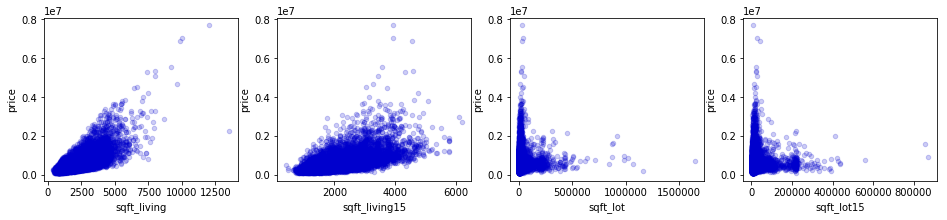

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='#0000CD')

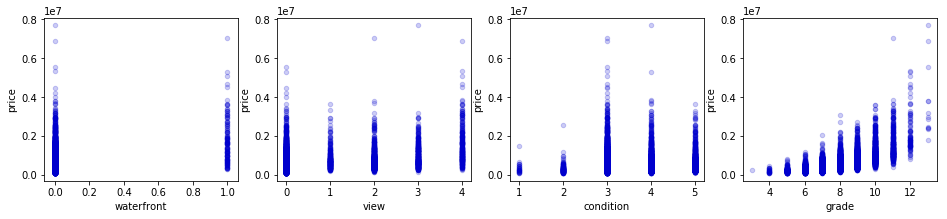

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['waterfront', 'view', 'condition', 'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='#0000CD')

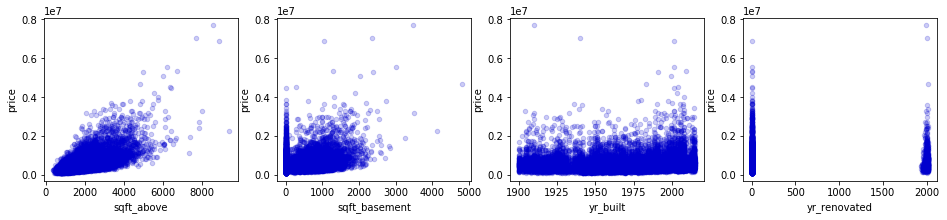

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_above', 'sqft_basement','yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='#0000CD')

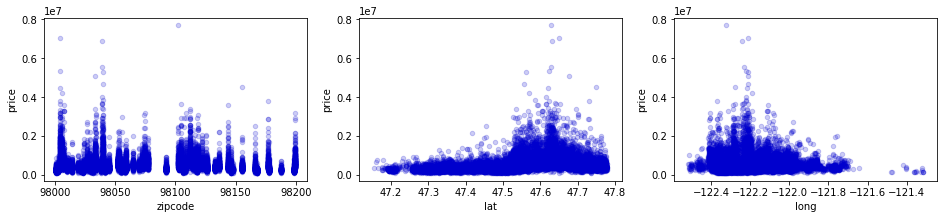

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip([ 'zipcode', 'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='#0000CD')

There seems to be a linear relationship between 'sqft_living', 'sqft_living15', 'sqft_above', 'grade', and 'lat'. There appears to be a negative linear relationship between 'price' and 'long'. This is likely because 'long' is given in negative numbers. 

Dropping Variables

'id' - This unique identifier applies to each property. once used to identify and remove duplicates, it can now be removed from our dataset. 

'date' - The dataset includes data from May 2, 2014 - May 5, 2015. This variable will not be used to sort of select data. 

'floors' - Floors does not show a linear relationship with prices

'waterfront' - Waterfront initially seemed to have a linear relationship with price but only 0.68% of homes in our dataset are located on the waterfront. With so little useful data, I will remove it from the analysis. 

'view'- View does not show a linear relationship with price

'condition' - Condition does not show a linear relationship with price

'yr_built' - Yr_built does not show a linear relationship with price

'yr_renovated' - Yr_renovated does not show a linear relationship with price

'zipcode' - This is a categorical variable. It has 70 different categories as seen by running .nunique(). Let's drop 'zipcode' from our data set because there are too many categories to easily classify and our 'lat' and 'long' variables in essence capture the location of the house.

In [34]:
df['zipcode'].nunique()

70

I decided to drop 'id' from the data set because it will not be used during analysis. Once I used 'id' to identify and drop duplicates from the data set, I will not longer use this identifier. 

In [35]:
df.drop(['id', 'date', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode'], axis=1, inplace=True)

In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

04 Data Exploration and 05 Feature Engineering

Now that I have removed the necessary data from our data set, let's transform the data for analysis. 

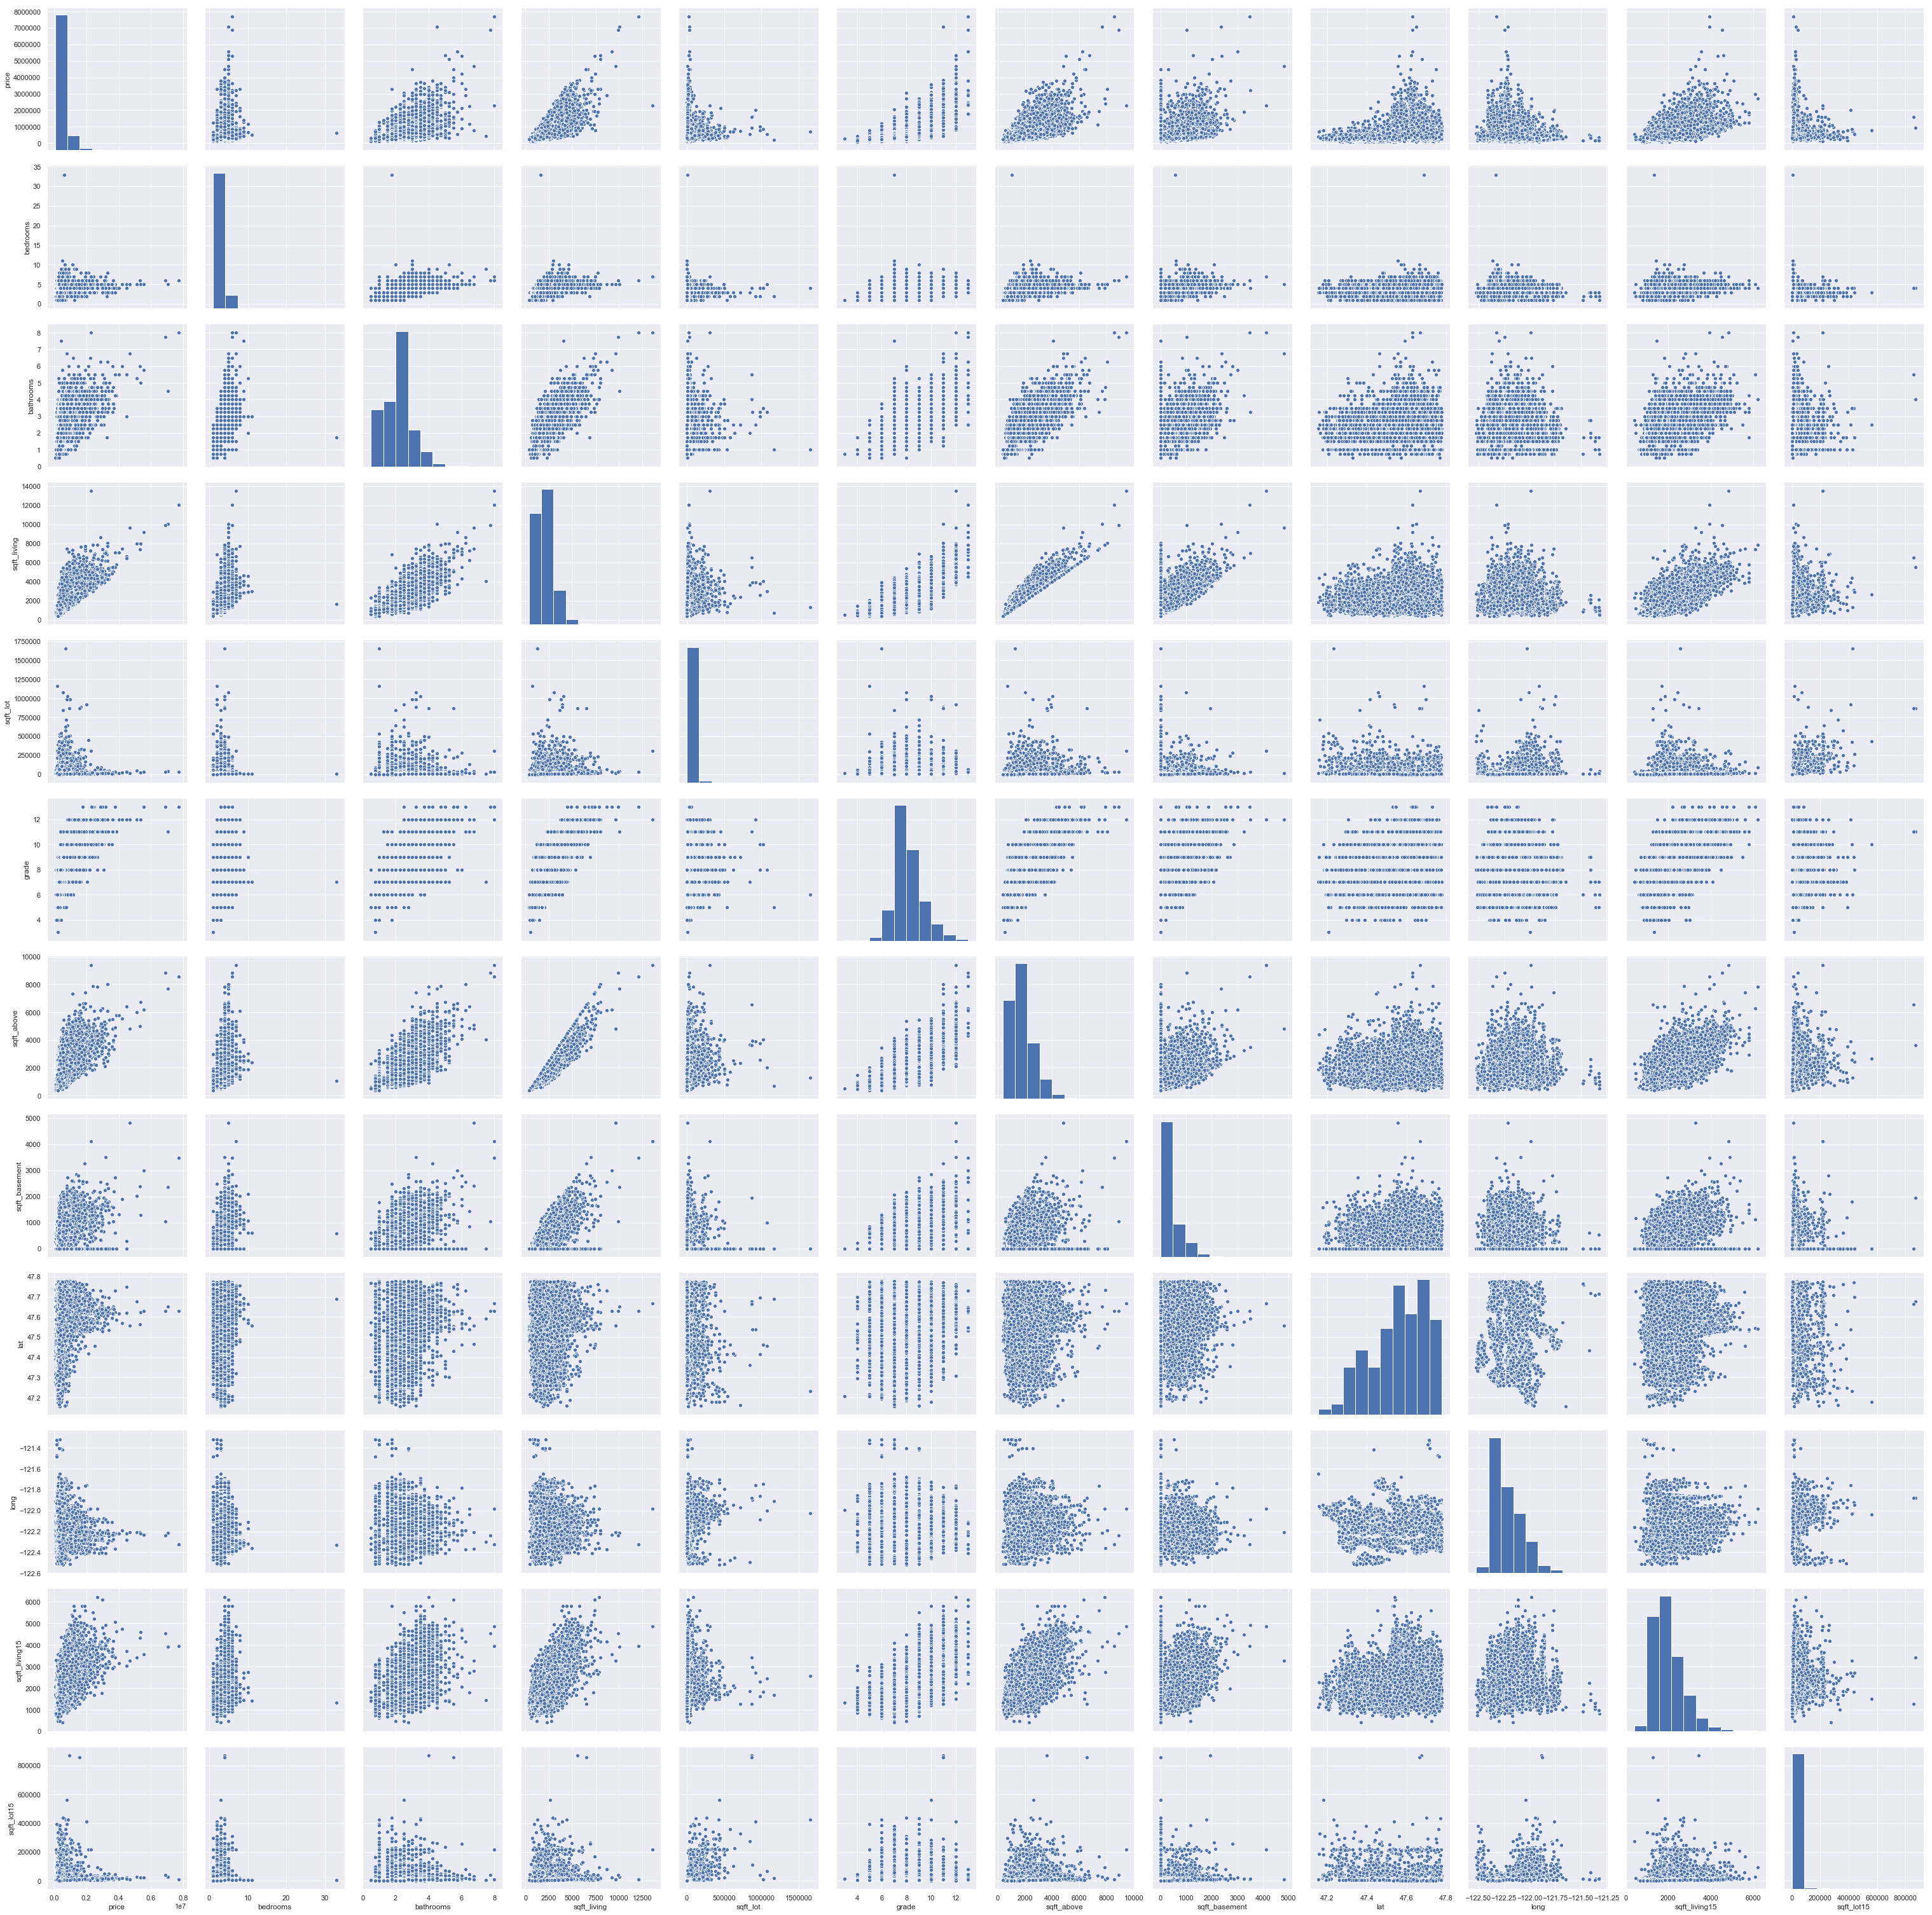

In [37]:
sns.set()
sns.pairplot(df, height = 3.5)
plt.show();

Find and Remove Outliers

Lets have a look at the data visually to look for outliers

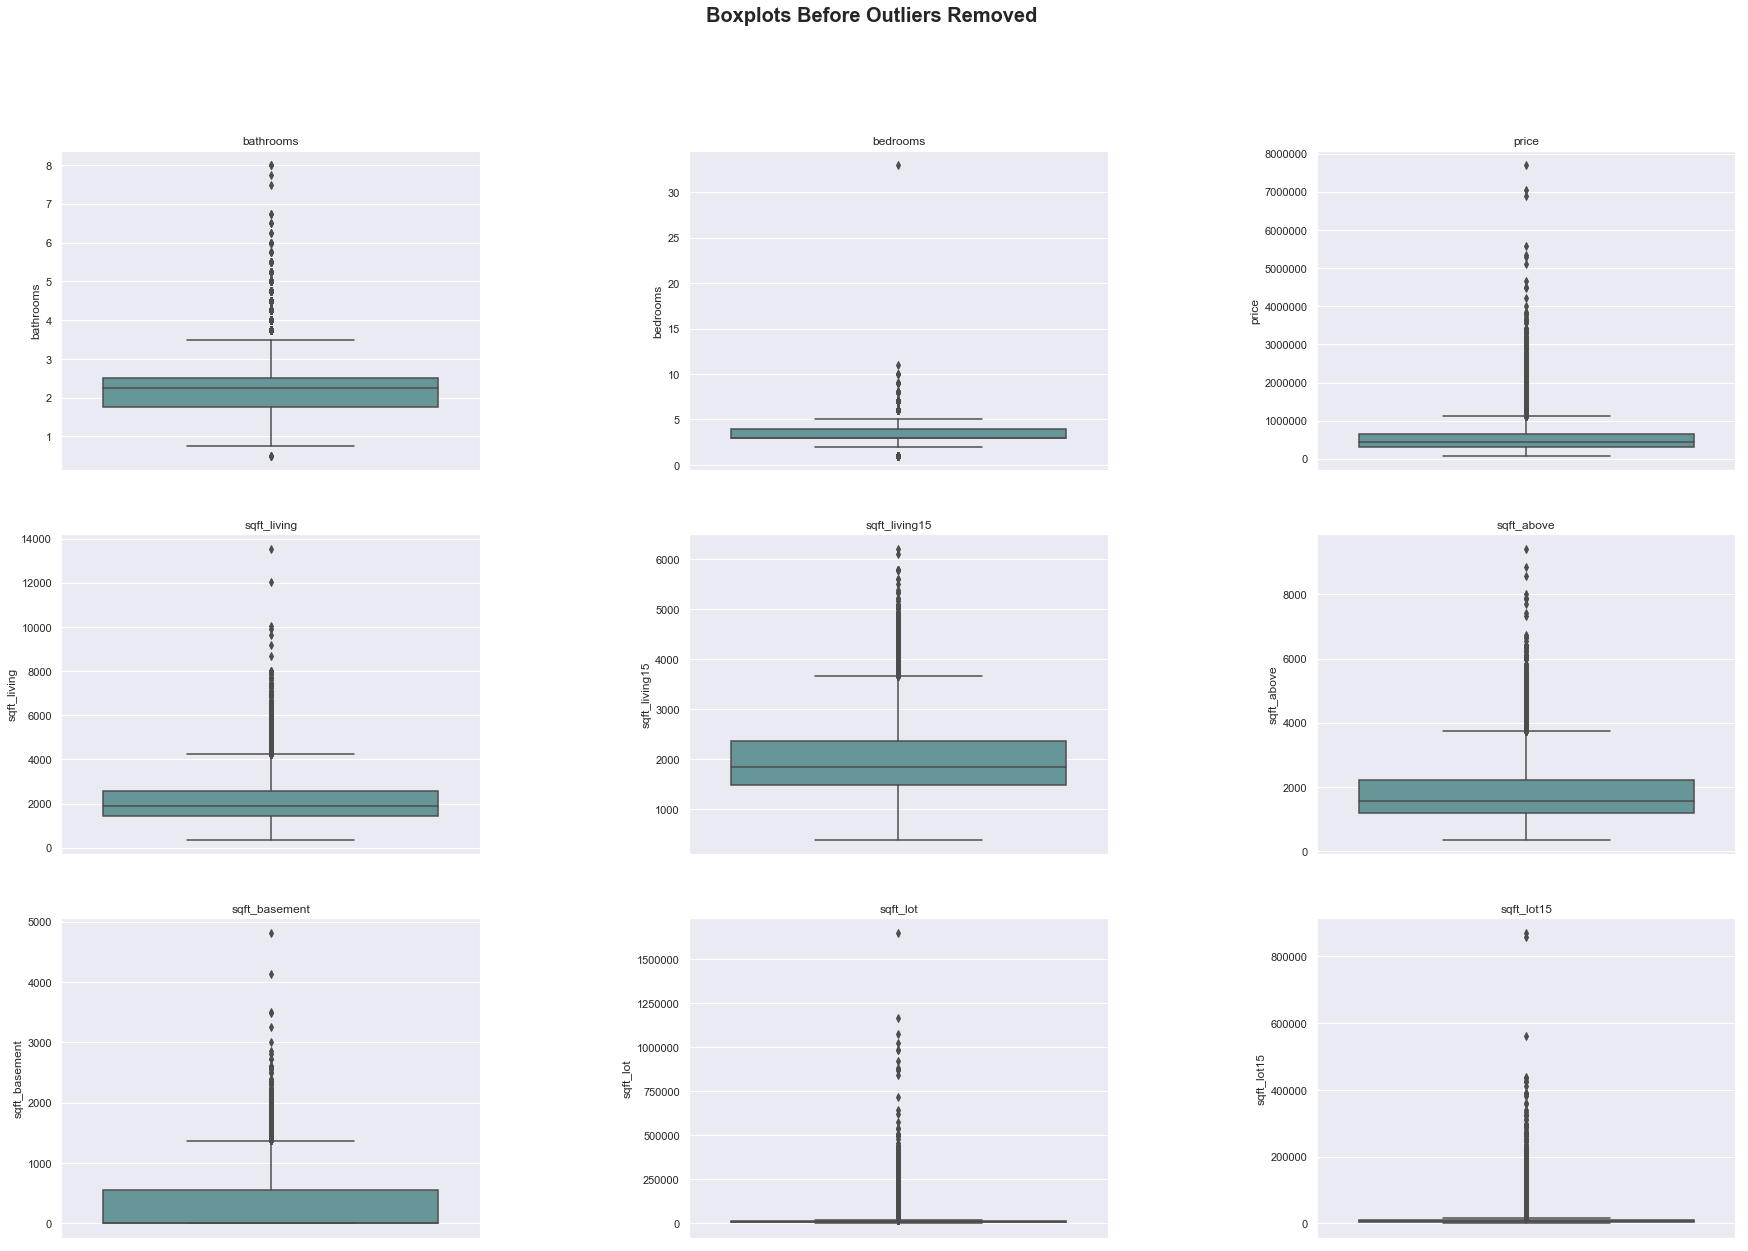

In [38]:
columns = ['bathrooms', 'bedrooms', 'price', 'sqft_living', 'sqft_living15','sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_lot15']

sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(30, 20)
fig.suptitle("Boxplots Before Outliers Removed", fontsize=20, fontweight='bold')

for ax, feature in zip(axes.flatten(), columns):
    sns.boxplot(df[feature], orient='v', ax=ax, color="#5F9EA0")
    ax.set(title=feature)
#box plots with outliers

House with 0 bedrooms likely data error
House with 33 bathrooms likely data error
Prices varies widely with outliers up to $8M

Let's mathematically identify and remove outliers from our dataset. 

In [39]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
print(IQR)

price            323000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5645.0000
grade                 1.0000
sqft_above         1020.0000
sqft_basement       550.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
sqft_lot15         4983.0000
dtype: float64


In [40]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(16443, 12)

Box Plots After Outliers Removed

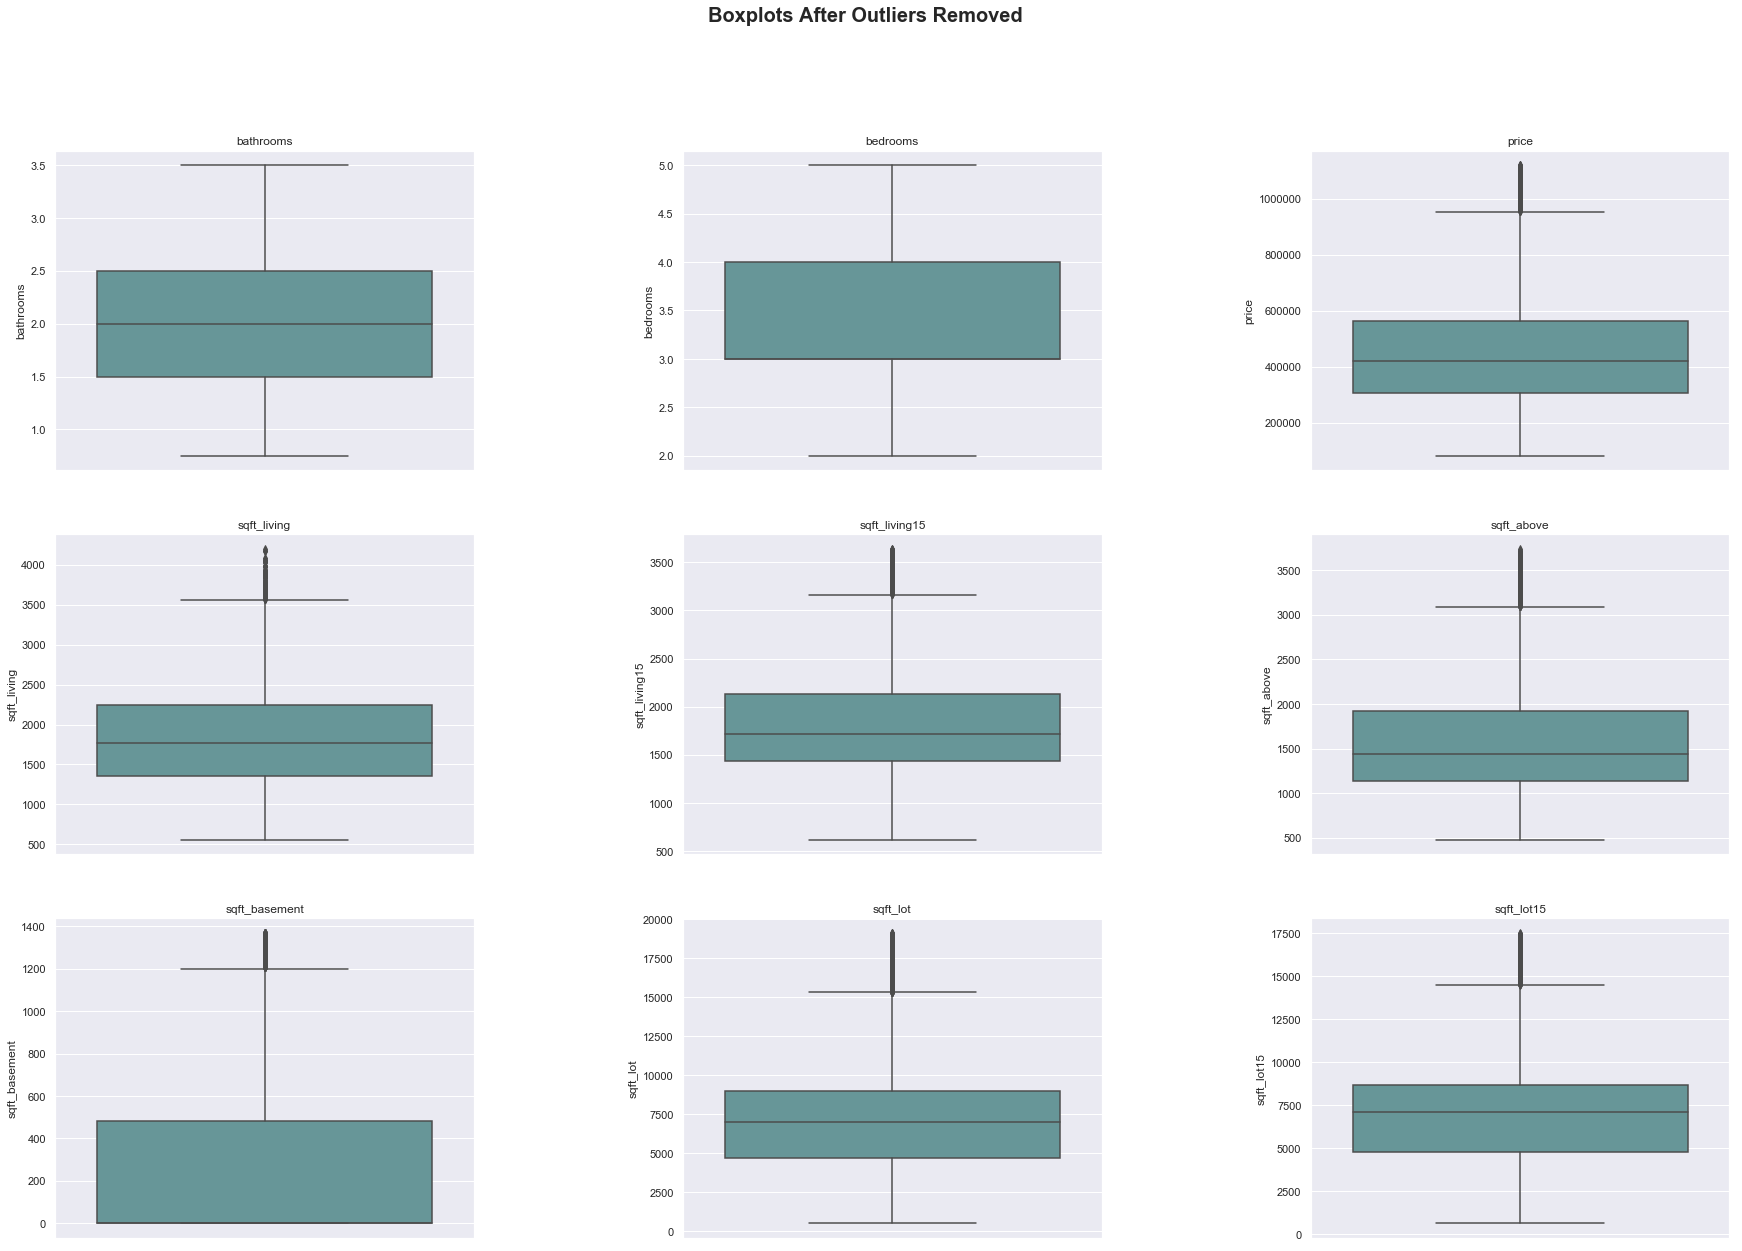

In [41]:
columns = ['bathrooms', 'bedrooms', 'price', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_lot15']

sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(30, 20)
fig.suptitle("Boxplots After Outliers Removed", fontsize=20, fontweight='bold')

for ax, feature in zip(axes.flatten(), columns):
    sns.boxplot(df[feature], orient='v', ax=ax, color="#5F9EA0")
    ax.set(title=feature)
#box plots no outliers

We see a more normal distribution once outliers more than 1.5 outside the IQR were removed. 

Scaling

The values in our data set cary widely. In order to compare them and examine the relationship between them I chose to scale them using Min-Max Scaling. All values will now be in a range between 0 and 1. 

In [42]:
scales = list(df.columns.values)

for scale in scales:
    df[scale] = (df[scale] - min(df[scale]))/(max(df[scale]) - min(df[scale]))

Log Transformation 

I chose to use log transformation on the continuous variables to coax a more normal distribution for linear regression. Let's look at the distribution of our variables before and after log transformation. 

C:\Users\krystiandennis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


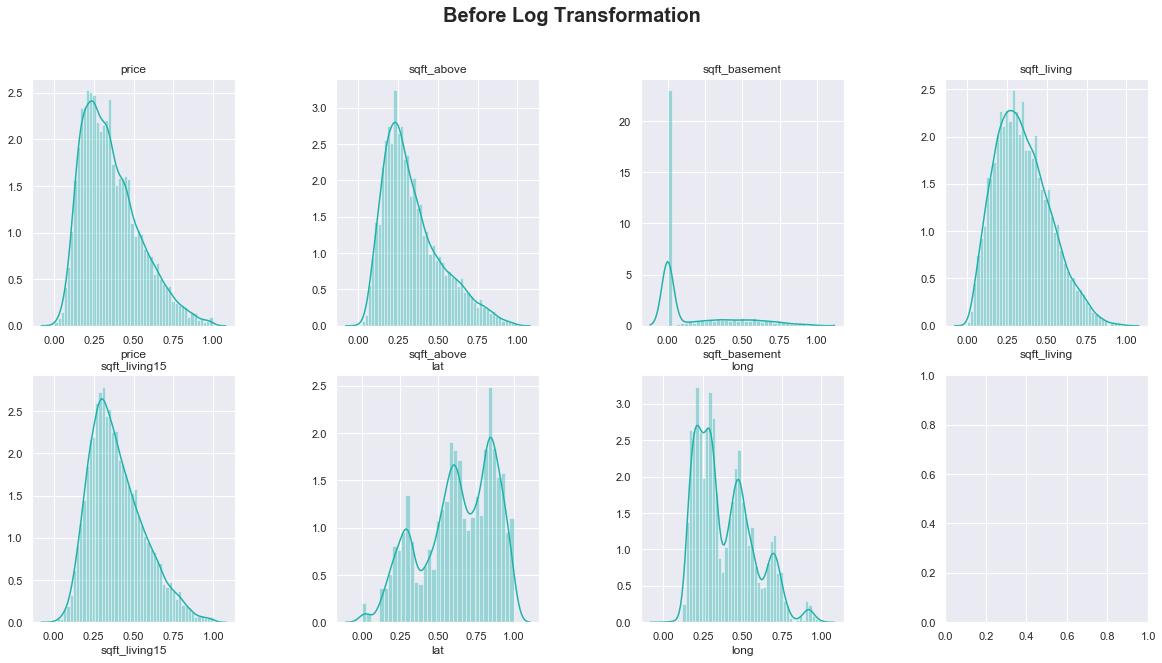

In [45]:
variable = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'lat', 'long']

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle("Before Log Transformation", fontsize=20, fontweight='bold')

for ax, var in zip(axes.flatten(), variable):
    sns.distplot(df[var], ax=ax, color="#20B2AA")
    ax.set(title=var)

In [46]:
df['price'] = df['price'].map(lambda x: np.log(x+1))
df['sqft_living'] = df['sqft_living'].map(lambda x: np.log(x+1))
df['sqft_above'] = df['sqft_above'].map(lambda x: np.log(x+1))
df['sqft_basement'] = df['sqft_basement'].map(lambda x: np.log(x+1))
df['sqft_lot'] = df['sqft_lot'].map(lambda x: np.log(x+1))
df['sqft_lot15'] = df['sqft_lot15'].map(lambda x: np.log(x+1))
df['lat'] = df['lat'].map(lambda x: np.log(x+1))
df['long'] = df['long'].map(lambda x: np.log(abs(x+1)))

C:\Users\krystiandennis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


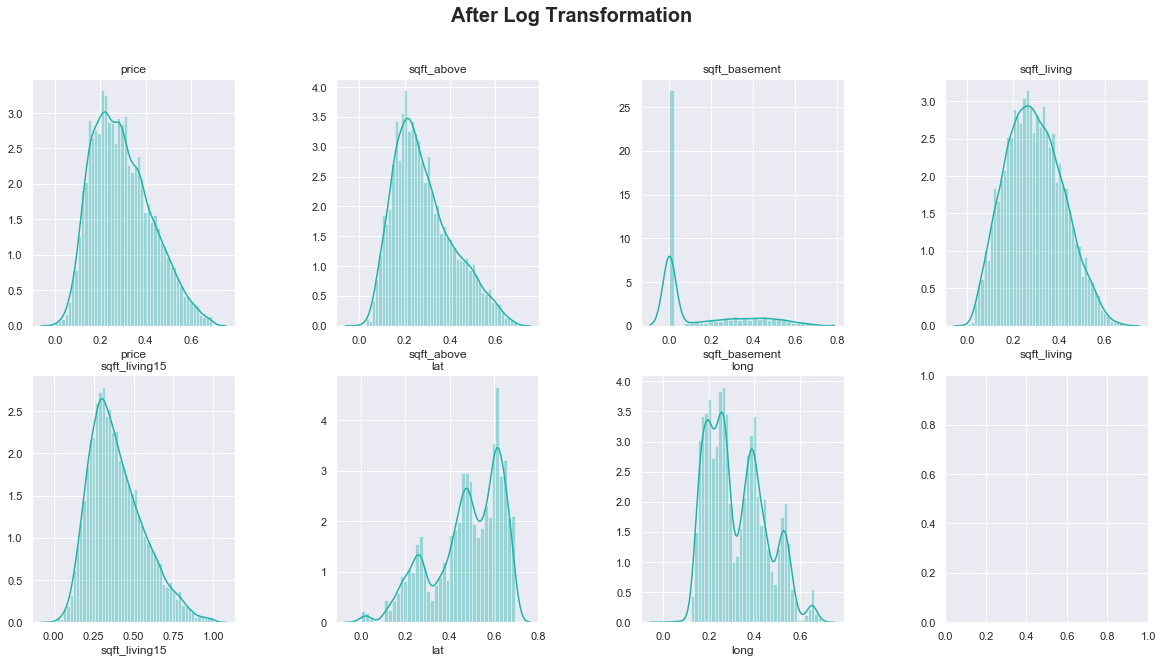

In [47]:
variable = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'lat', 'long']

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle("After Log Transformation", fontsize=20, fontweight='bold')

for ax, var in zip(axes.flatten(), variable):
    sns.distplot(df[var], ax=ax, color="#20B2AA")
    ax.set(title=var)

Multicollinearity

Let's check to see that our predictor variables are not too highly correlated with one another. For linear regression we need to be able to assume that one variable can change while the others remain constant. This assumption cannot be made if one or more predictors variables are highly correlated with another. A high correlation coefficient is considered bewteen 0.7 and 0.8. For this analysis, I chose 0.75. Since 'price' is my target variable, I removed it from the correlation matrix. 

In [49]:
only_predictors = df.drop('price', axis = 1)

In [50]:
correlation = abs(round(only_predictors.corr(), 2))

Text(0.5, 1.0, 'Correlation Heatmap')

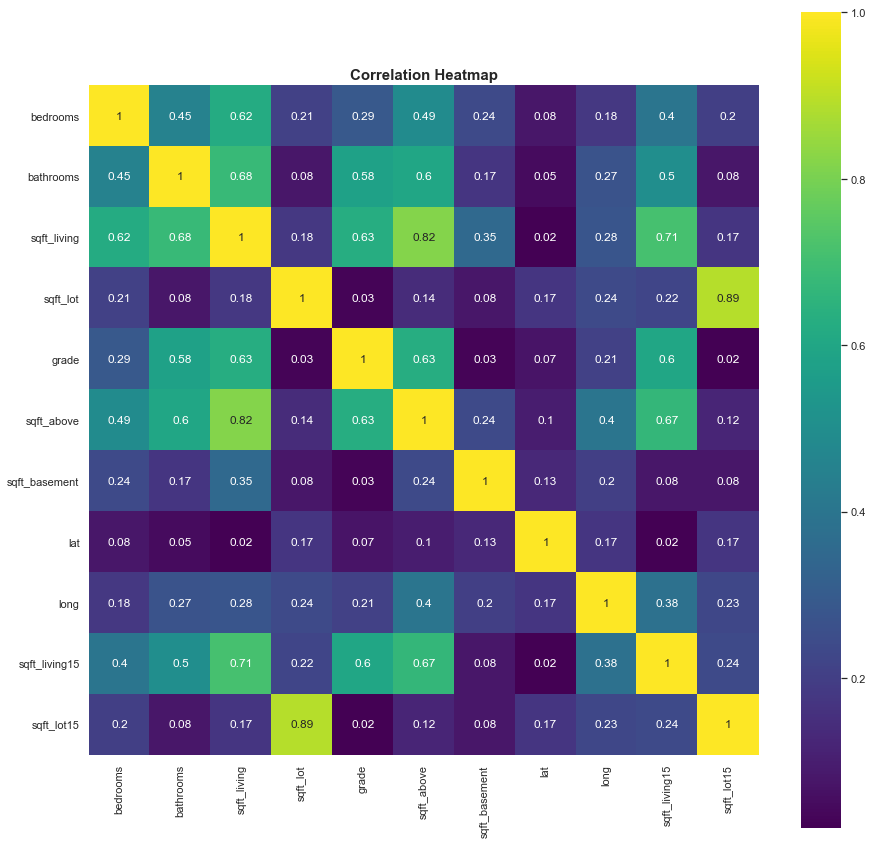

In [51]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot = True, square=True, cmap = 'viridis')
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)

In [52]:
collinearity = correlation > 0.75
collinearity

#false = correlation < 0.75. true = correlation > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  grade  sqft_above  \
bedrooms           True      False        False     False  False       False   
bathrooms         False       True        False     False  False       False   
sqft_living       False      False         True     False  False        True   
sqft_lot          False      False        False      True  False       False   
grade             False      False        False     False   True       False   
sqft_above        False      False         True     False  False        True   
sqft_basement     False      False        False     False  False       False   
lat               False      False        False     False  False       False   
long              False      False        False     False  False       False   
sqft_living15     False      False        False     False  False       False   
sqft_lot15        False      False        False      True  False       False   

               sqft_basement    lat   long  sqft_living15  sqft_lot15  
bedrooms               False  False  False          False       False  
bathrooms              False  False  False          False       False  
sqft_living            False  False  False          False       False  
sqft_lot               False  False  False          False        True  
grade                  False  False  False          False       False  
sqft_above             False  False  False          False       False  
sqft_basement           True  False  False          False       False  
lat                    False   True  False          False       False  
long                   False  False   True          False       False  
sqft_living15          False  False  False           True       False  
sqft_lot15             False  False  False          False        True

In [53]:
print('The correlation coefficient between "sqft_living" and "sqft_above" is '
      + str(round(np.corrcoef(df['sqft_living'],df['sqft_above'])[0,1],2))+'%')
print('The correlation coefficient between "sqft_lot" and "sqft_lot15" is '
      + str(round(np.corrcoef(df['sqft_lot'],df['sqft_lot15'])[0,1],2))+'%')

The correlation coefficient between "sqft_living" and "sqft_above" is 0.82%
The correlation coefficient between "sqft_lot" and "sqft_lot15" is 0.89%


Dropping Variables

'sqft_above' - collinearity with sqft_living. sqft_above = sqft_living - sqft_basement. Therefore, sqft_above is accounted for in the dataframe. 

'sqft_basement' - included in sqft_living

'sqft_lot15' - collinearity with sqft_lot

These variables were dropped from our dataset to eliminate collinearity in our linear regression model. 

In [54]:
df.drop(['sqft_above', 'sqft_basement', 'sqft_lot15'], axis=1, inplace=True)

Now that we have removed variables showing collinearity, let's see how our remaining varaibles ('bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'grade', 'long', 'lat') correlate with 'price'. 

In [55]:
corr_matrix = abs(round(df.corr(), 2))
corr_matrix['price'].sort_values(ascending = False)

price            1.00
grade            0.54
sqft_living      0.52
lat              0.51
sqft_living15    0.46
bathrooms        0.36
bedrooms         0.24
sqft_lot         0.09
long             0.00
Name: price, dtype: float64

All of our remaining variables show a strong correlation with price, except 'bedrooms', 'sqft_lot' and 'long'. Let's explore this further.

Three Questions:

1. House Size vs. Price - How does the square footage of the house affect the sales price?
2. Grade vs. Price - How does the grade of the property affect the sales price?
3. Location (Long - Lat) vs. Price - How does the location in King County affect sales price?

House Size vs. Price

C:\Users\krystiandennis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


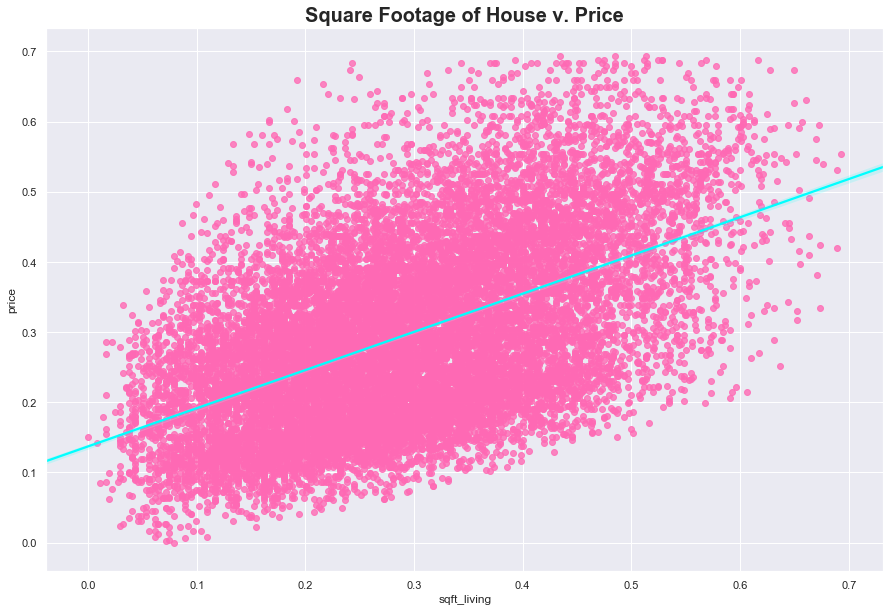

In [56]:
plt.figure(figsize=(15,10))
sns.regplot(x='sqft_living', y='price', data=df, color="#FF69B4", line_kws={"color": '#00FFFF'})
plt.title("Square Footage of House v. Price", fontsize=20, fontweight='bold')
plt.show()

#regression line

There is a clear linear relationship between Square footage and price. 

Grade vs. Price

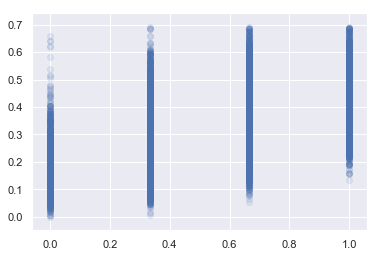

In [57]:
plt.scatter(df['grade'], df['price'], alpha=.1);

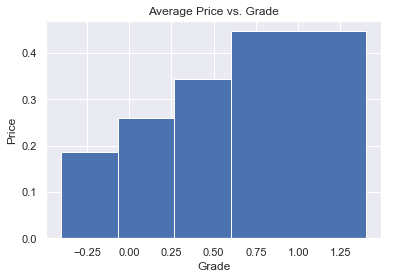

In [58]:
grade_and_price = df.groupby('grade').mean().reset_index()

plt.bar(grade_and_price['grade'], grade_and_price['price'])
plt.title('Average Price vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

Grade exibihits are strong linear relationship with price. 

Location (Log - Lat) vs. Price

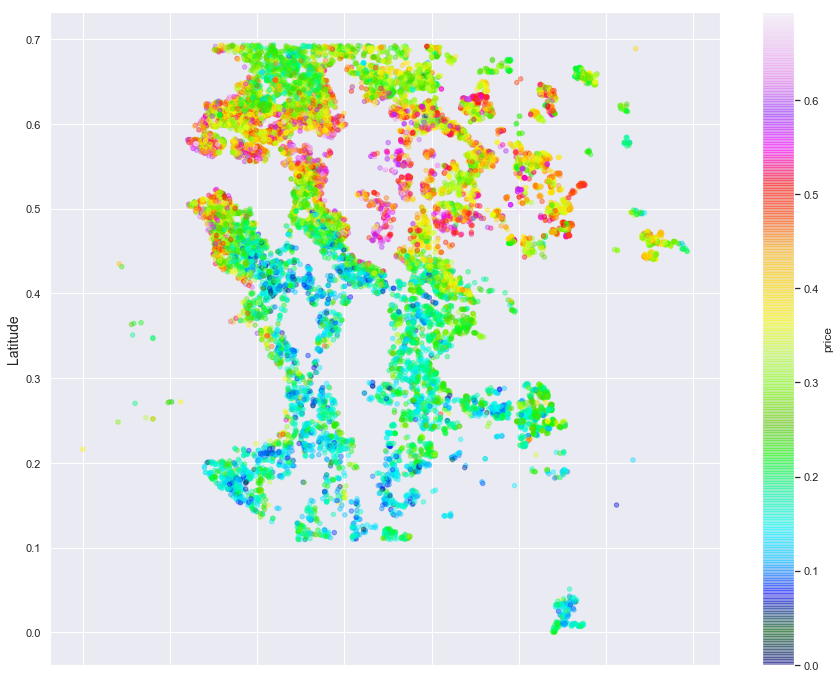

In [59]:
df.plot(kind="scatter", x="long", y="lat",c="price",
             cmap=plt.get_cmap("gist_ncar"),colorbar=True,
             alpha=0.4,figsize=(15, 12))
#labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

It seems that east-west location of the property does not influence price as much as North-South orientation. Houses with the highest prices are concentrated in the NE.

06 Predictive Modeling

Model

Simple Linear Regression

King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricebedrooms
_____________________________________________________________________________________


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


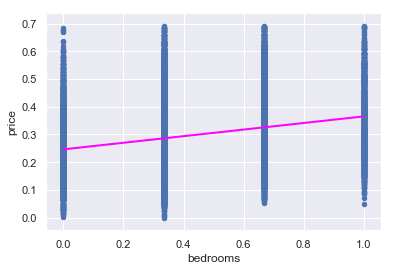

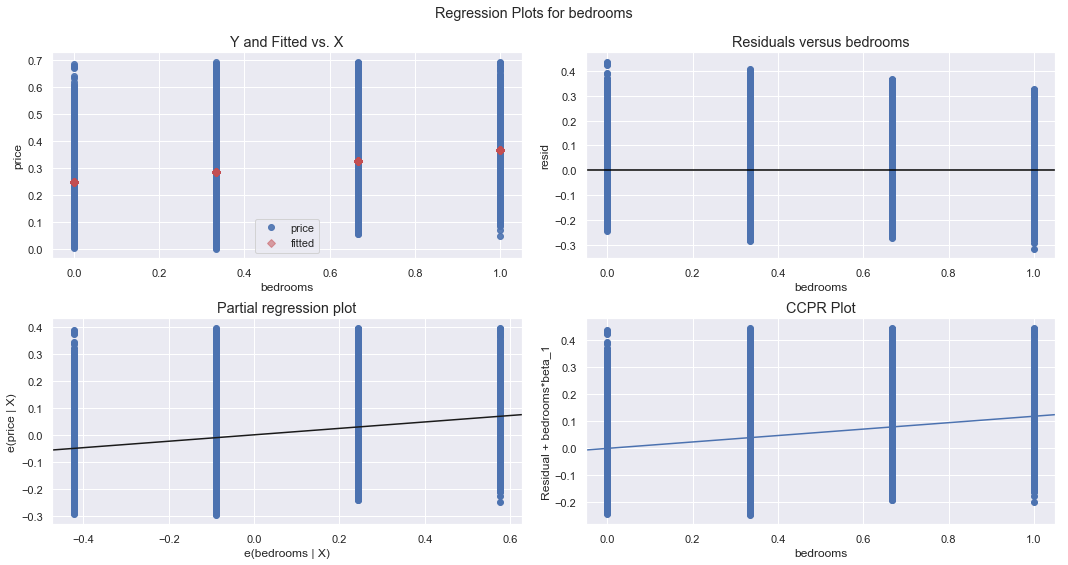

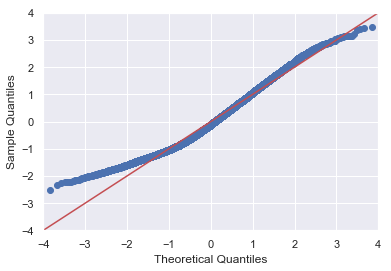

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637]]
Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricebathrooms
_____________________________________________________________________________________


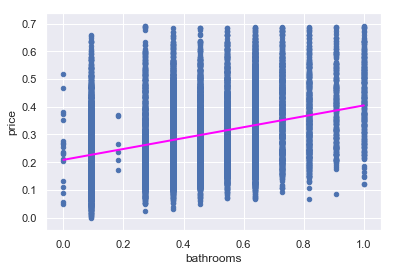

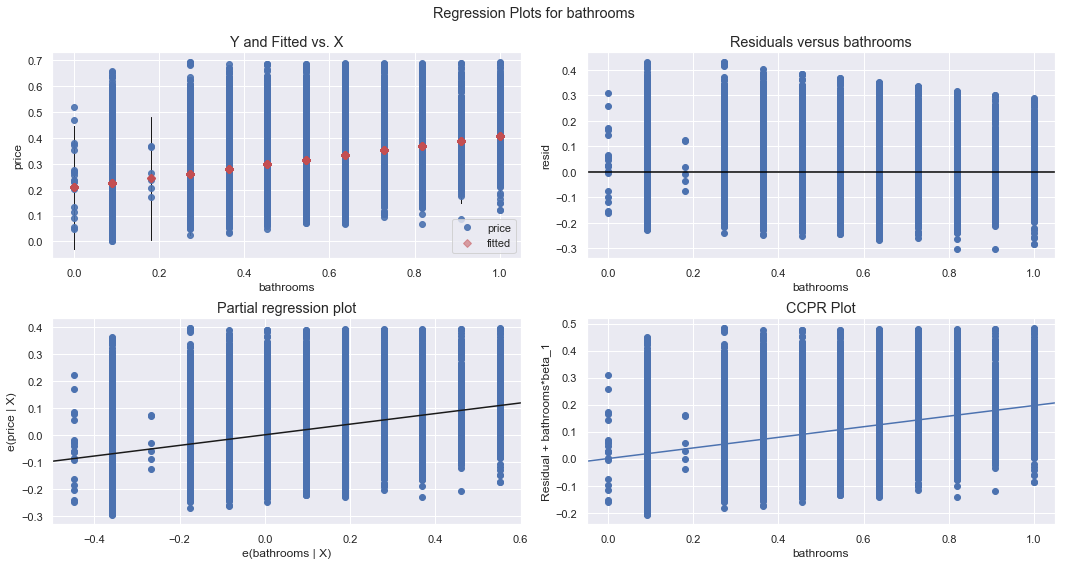

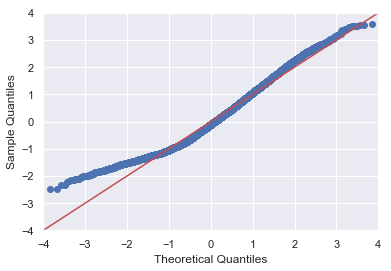

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901]]
Press Enter to continue...
King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_living
_____________________________________________________________________________________


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


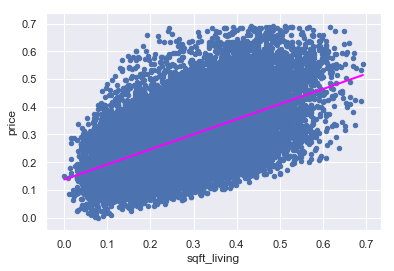

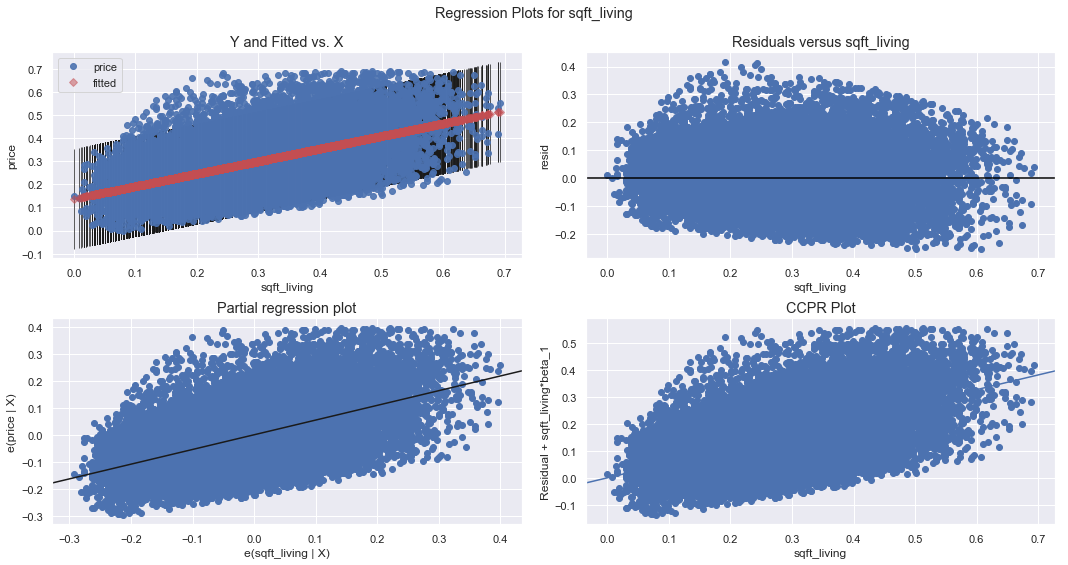

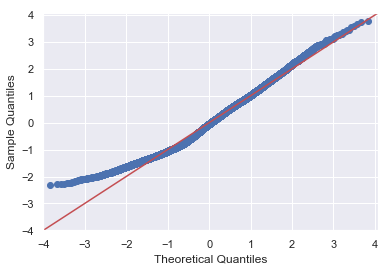

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869]]
Press Enter to continue...
King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_living15
_____________________________________________________________________________________


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


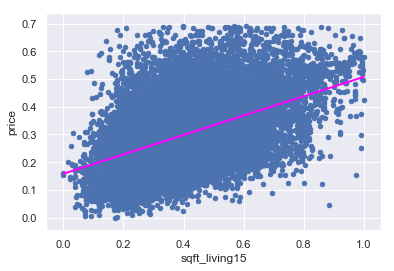

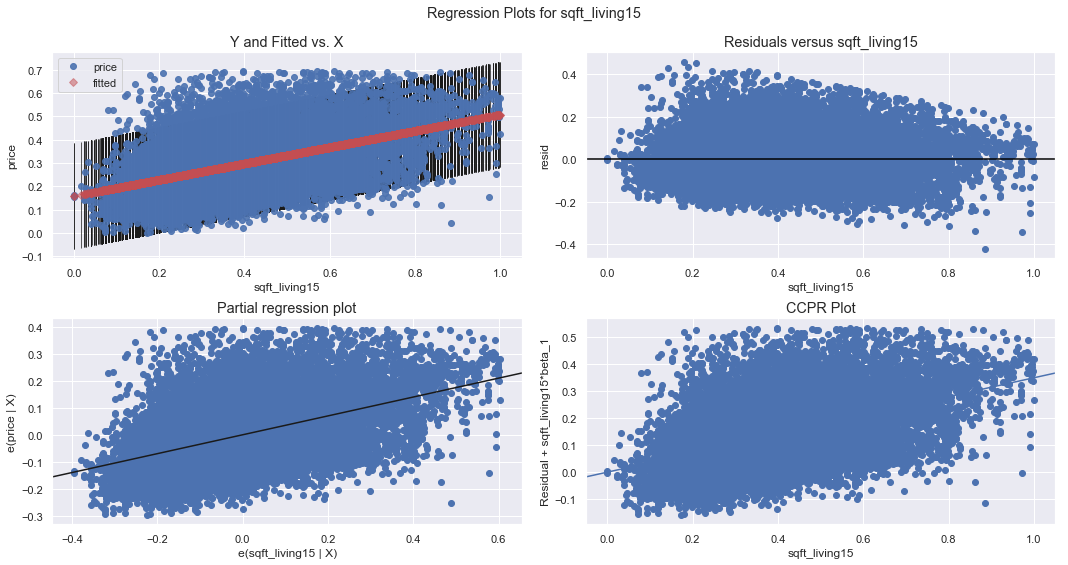

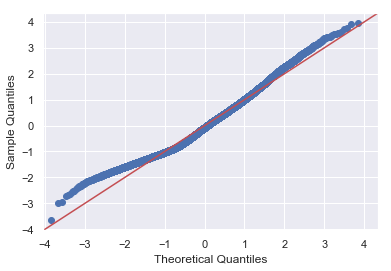

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869], ['sqft_living15', 0.21015287759989054, 0.1582711419599885, 0.3494429574789429, 0.0, 684.9328184195816]]
Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_lot
_____________________________________________________________________________________


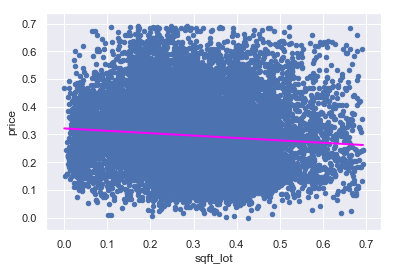

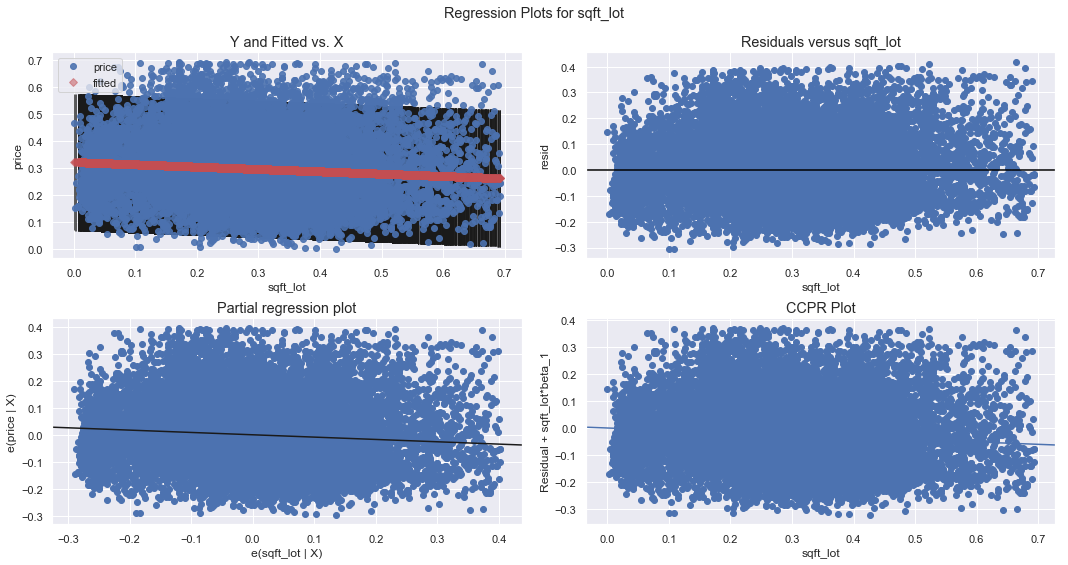

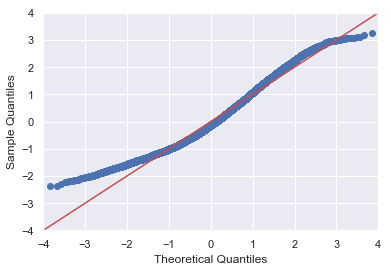

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869], ['sqft_living15', 0.21015287759989054, 0.1582711419599885, 0.3494429574789429, 0.0, 684.9328184195816], ['sqft_lot', 0.007751447489028562, 0.3216907736726138, -0.08633584765573678, 1.1602916075036948e-29, 843.1372870969848]]
Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricegrade
_____________________________________________________________________________________


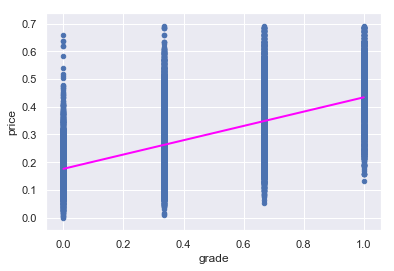

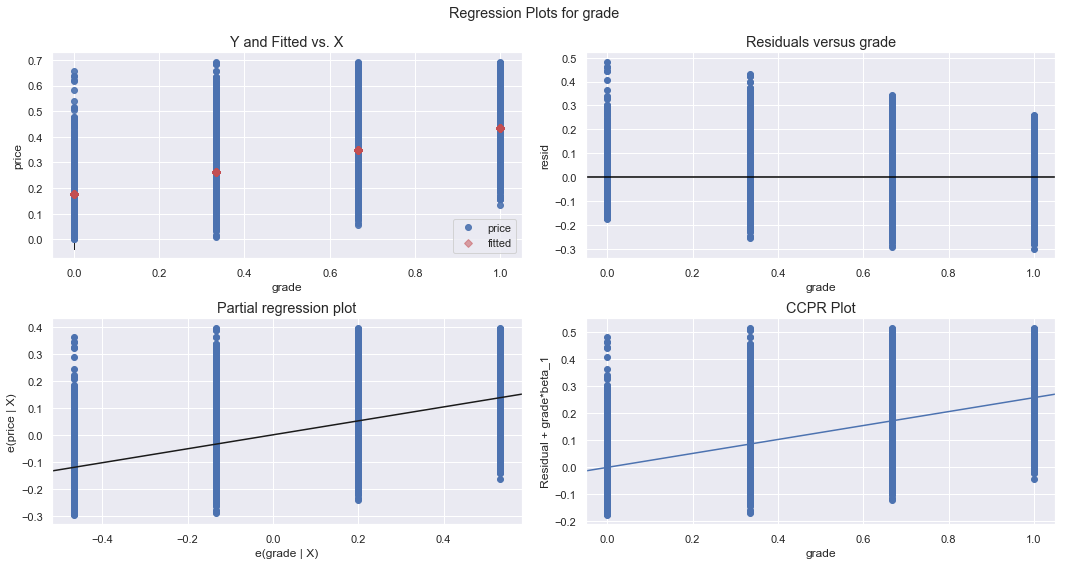

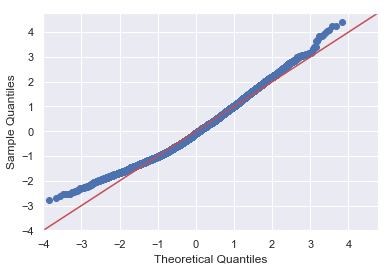

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869], ['sqft_living15', 0.21015287759989054, 0.1582711419599885, 0.3494429574789429, 0.0, 684.9328184195816], ['sqft_lot', 0.007751447489028562, 0.3216907736726138, -0.08633584765573678, 1.1602916075036948e-29, 843.1372870969848], ['grade', 0.29061132042294113, 0.17606598666076478, 0.25809764216647557, 0.0, 583.3869749211402]]
Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricelat
_____________________________________________________________________________________


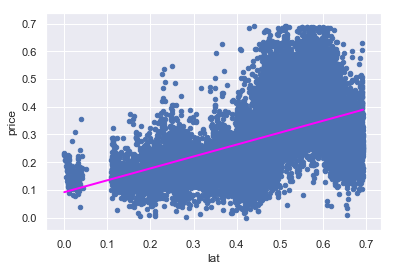

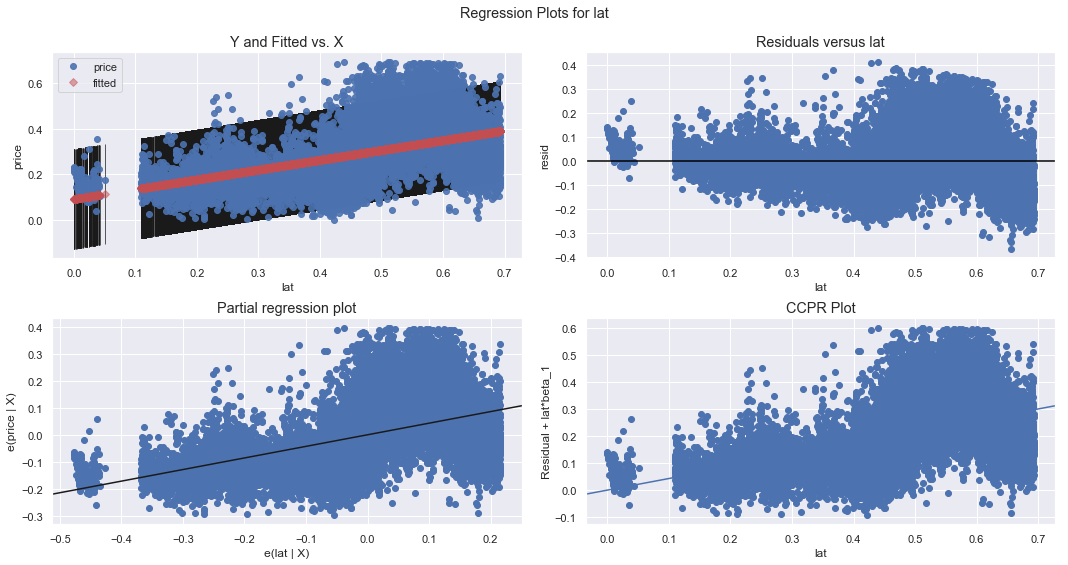

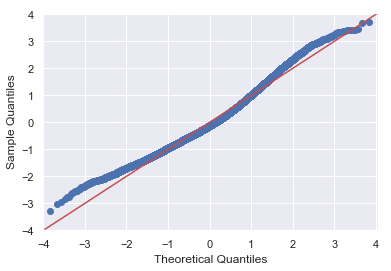

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869], ['sqft_living15', 0.21015287759989054, 0.1582711419599885, 0.3494429574789429, 0.0, 684.9328184195816], ['sqft_lot', 0.007751447489028562, 0.3216907736726138, -0.08633584765573678, 1.1602916075036948e-29, 843.1372870969848], ['grade', 0.29061132042294113, 0.17606598666076478, 0.25809764216647557, 0.0, 583.3869749211402], ['lat', 0.2619129968561994, 0.09175642562438756, 0.4291257862454706, 0.0, 874.6863258622061]]
Press Enter to continue...
King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: pricelong
______________________________________________________

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


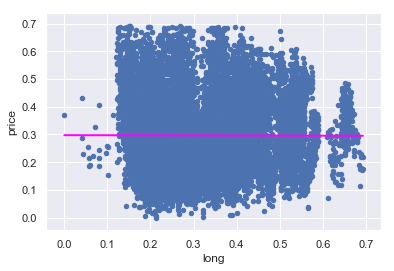

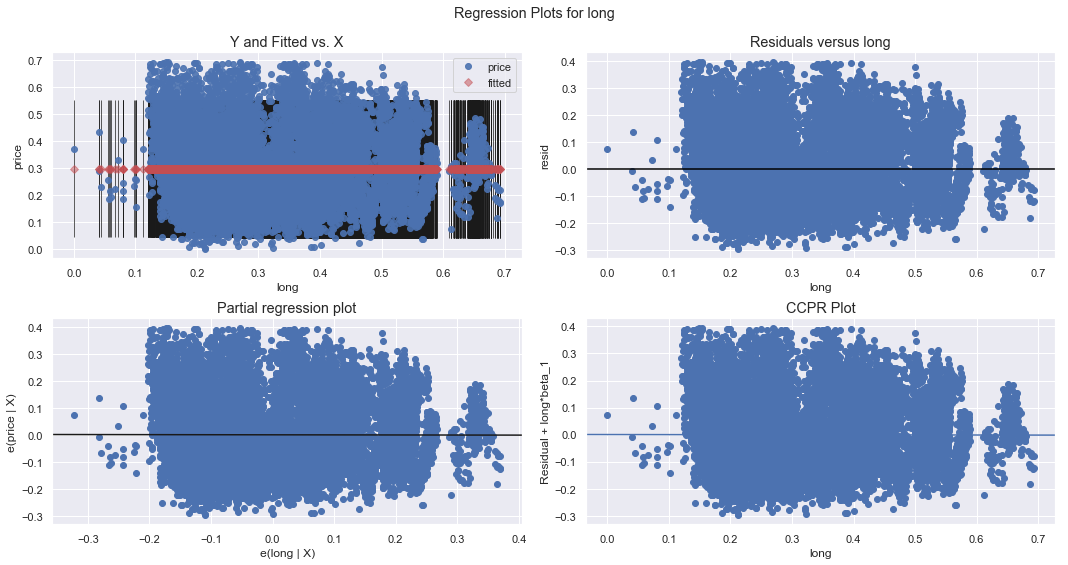

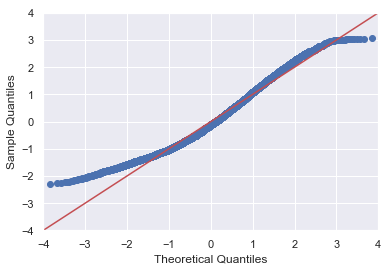

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'], ['bedrooms', 0.056231703957177914, 0.2463371400800935, 0.11892697887409052, 6.301238263837301e-209, 685.8646931961637], ['bathrooms', 0.12812489701149754, 0.20847278368128097, 0.19643763110850035, 0.0, 810.0802261794901], ['sqft_living', 0.27321289448898933, 0.1372166725167996, 0.5441129375206419, 0.0, 482.8148383083869], ['sqft_living15', 0.21015287759989054, 0.1582711419599885, 0.3494429574789429, 0.0, 684.9328184195816], ['sqft_lot', 0.007751447489028562, 0.3216907736726138, -0.08633584765573678, 1.1602916075036948e-29, 843.1372870969848], ['grade', 0.29061132042294113, 0.17606598666076478, 0.25809764216647557, 0.0, 583.3869749211402], ['lat', 0.2619129968561994, 0.09175642562438756, 0.4291257862454706, 0.0, 874.6863258622061], ['long', 8.066244769233677e-06, 0.2975424441795138, -0.0029194778769801623, 0.7157373797338722, 774.557714012995]]
Press Enter to continue...


In [60]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'grade', 'lat', 'long']):
    print ("King County Washington Housing DataSet - Regression Analysis and Diagnostics for formula: price" + val)
    print ("_____________________________________________________________________________________")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='#FF00FF', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    
    print(results)
    
    input("Press Enter to continue...")

From the simple linear regression, I will remove 'bedrooms'(r-squared:  0.05, p-value:  6.30e-209), 'sqft_lot'(r-squared:  0.007, p-value:  1.16e-29), 'long'(r-squared:  8.06e-06, p-value:  0.71). 

In [61]:
df = df.drop(['bedrooms', 'sqft_lot', 'long'], axis = 1)

Train-Test Split

In order to build a model ouorr data will be split into two part. The training set will be used to train the model. The test set will be used to evaluate the performance of the model. I have chosen an 80/20 split, 80% will be used to train the model and 20% will be used to test it. 

In [62]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RFE - Recursive Feature Elimination

The number of predictors used for each model is specified. Since I have chosen 5 independent variables. I have chosen to use 2, then 4, then all 5 variables. Each time, RFE determines the least well perfoming variables and removes them from the model. 

In [63]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(X_train, y_train)

In [64]:
rfe_variables = dict(zip(X_train.columns.values, selector.support_))
rfe_variables

{'bathrooms': False,
 'sqft_living': True,
 'grade': False,
 'lat': True,
 'sqft_living15': False}

In [65]:
X_train_1 = pd.DataFrame(X_train[['sqft_living', 'lat']])

In [66]:
X_train_1 = sm.add_constant(X_train_1)

model = sm.OLS(y_train, X_train_1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     7798.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:49:07   Log-Likelihood:                 13408.
No. Observations:               13154   AIC:                        -2.681e+04
Df Residuals:                   13151   BIC:                        -2.679e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0742      0.003    -24.040      0.000      -0.080      -0.068
sqft_living     0.5514      0.006     90.150      0.000       0.539       0.563
lat             0.4371      0.005     88.622      0.000       0.427       0.447
==============================================================================
Omnibus:                      733.790   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.381
Skew:                           0.548   Prob(JB):                    1.26e-203
Kurtosis:                       3.711   Cond. No.                         9.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only 55% of the variance in house prices can be explained by the model. Let's try again using 4 variables. 

In [67]:
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X_train, y_train)

In [68]:
rfe_variables = dict(zip(X_train.columns.values, selector.support_))
rfe_variables

{'bathrooms': False,
 'sqft_living': True,
 'grade': True,
 'lat': True,
 'sqft_living15': True}

In [69]:
X_train_2 = pd.DataFrame(X_train[['sqft_living', 'sqft_living15','grade','lat']])

In [70]:
X_train_2 = sm.add_constant(X_train_2)

model = sm.OLS(y_train, X_train_2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     4876.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:49:08   Log-Likelihood:                 14247.
No. Observations:               13154   AIC:                        -2.848e+04
Df Residuals:                   13149   BIC:                        -2.845e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0832      0.003    -27.950      0.000      -0.089      -0.077
sqft_living       0.3034      0.009     34.826      0.000       0.286       0.320
sqft_living15     0.0817      0.006     13.248      0.000       0.070       0.094
grade             0.1234      0.004     34.837      0.000       0.116       0.130
lat               0.4200      0.005     90.264      0.000       0.411       0.429
==============================================================================
Omnibus:                      864.737   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1129.690
Skew:                           0.605   Prob(JB):                    4.91e-246
Kurtosis:                       3.774   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is better, with an R-squared of 0.603. I'll run a third model with all variables. 

In [71]:
X_train = pd.DataFrame(X_train[['sqft_living', 'bathrooms', 'grade', 'lat', 'sqft_living15']])

In [72]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.summary()

#all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     3922.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:49:09   Log-Likelihood:                 14269.
No. Observations:               13154   AIC:                        -2.853e+04
Df Residuals:                   13148   BIC:                        -2.848e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0804      0.003    -26.782      0.000      -0.086      -0.075
sqft_living       0.3330      0.010     34.011      0.000       0.314       0.352
bathrooms        -0.0284      0.004     -6.589      0.000      -0.037      -0.020
grade             0.1300      0.004     35.368      0.000       0.123       0.137
lat               0.4179      0.005     89.720      0.000       0.409       0.427
sqft_living15     0.0797      0.006     12.930      0.000       0.068       0.092
==============================================================================
Omnibus:                      823.094   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.348
Skew:                           0.584   Prob(JB):                    8.42e-234
Kurtosis:                       3.771   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is slightly better, with an R-squared of 0.604. The model can explain 60.4% of the variation in house prices. This is the model that will be used.

Cross Validation

I chose K-Fold Cross Validation it iterates through the data set and divides it into parts of equals sizes and then performs a regression again. On each pass, the size of the the test sample varies. 

In [73]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))

In [74]:
cv_5_results

-0.006708545852125425

In [75]:
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))

In [76]:
cv_10_results

-0.006709680737417495

In [77]:
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [78]:
cv_20_results

-0.006706932385892467

The cross-validation results suggest that the model is not overfitted. 

In [79]:
X_train_eval = X_train.drop('const', axis=1)

regressor = LinearRegression()
regressor.fit(X_train_eval, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_predict_test = regressor.predict(X_test)

y_predict_train = regressor.predict(X_train_eval)

In [81]:
print('RMSE-train:', np.sqrt(metrics.mean_squared_error(y_predict_train, y_train)))
print('RMSE-test:', np.sqrt(metrics.mean_squared_error(y_predict_test, y_test)))

RMSE-train: 0.08178458165857781
RMSE-test: 0.11715447626727792


In [82]:
Difference =  np.sqrt(metrics.mean_squared_error(y_predict_train, y_train)) - np.sqrt(metrics.mean_squared_error(y_predict_test, y_test))
Difference

-0.0353698946087001

The difference between the trained model and the predicted model is very small, only -0.034. 

In [83]:
actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
actual_predicted_15 = actual_predicted.head(15)

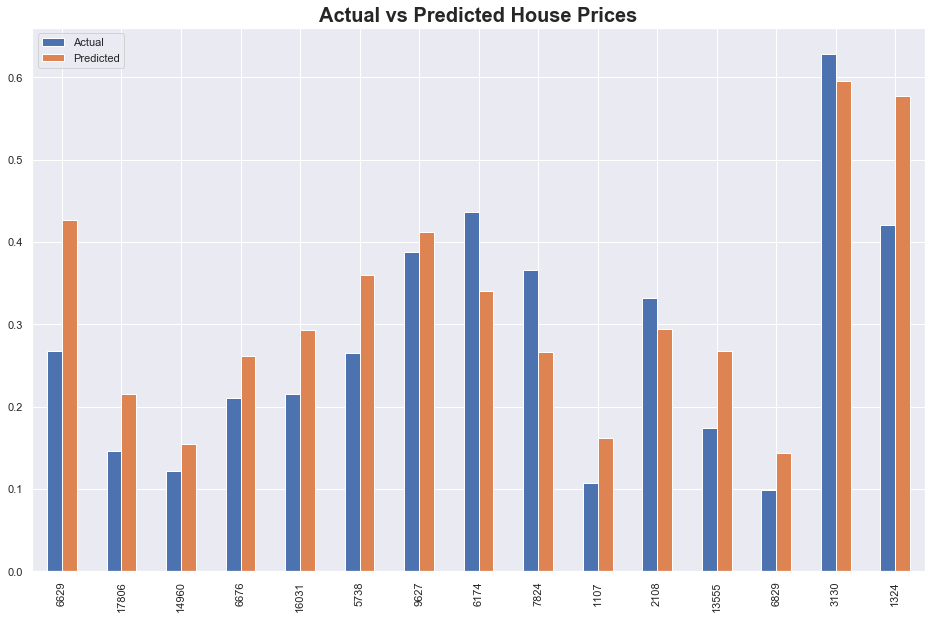

In [84]:
actual_predicted_15.plot(kind='bar', figsize=(16,10))
plt.title("Actual vs Predicted House Prices", fontsize=20, fontweight='bold')
plt.show()

Interpretation

The above bar chart shows that our model tends to predict house price very close to the actual house prices. In our model, all of the included variables have had a p-value less than 0.05. Both 'sqft_livng' and 'lat' have high influence on home sales prices. The model can predict 60% of the variation in house prices in King County, Washington. 

To improve the model, I could try scaling the variables differently and using a train-test split between 20-33% to find the optimal split level. 